In [2]:
import numpy as np
import matplotlib.pyplot as plt

NumDataPerClass = 200

m1 = [[0,5]]
m2 = [[5,0]]

C = [[2,1],[1,2]]


A = np.linalg.cholesky(C)



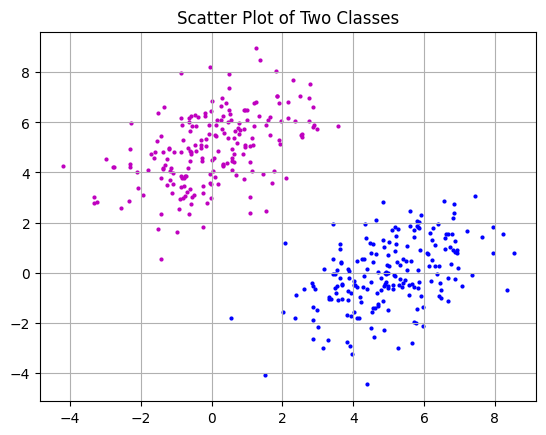

In [3]:
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1

U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2

fig, ax = plt.subplots()
ax.set_title('Scatter Plot of Two Classes')
ax.scatter(X1[:,0], X1[:,1], c="m", s=4)
ax.scatter(X2[:,0], X2[:,1], c="b", s=4)
plt.grid()




In [4]:
X = np.concatenate((X1, X2), axis = 0)

In [5]:
print(X)

[[-6.18726401e-01  5.64361454e+00]
 [ 1.13641275e+00  4.04188351e+00]
 [-1.59735161e+00  4.81208867e+00]
 [-4.94369040e-01  3.09086609e+00]
 [-6.19579899e-01  3.34974162e+00]
 [-1.70015905e+00  4.71680305e+00]
 [-7.89166575e-01  3.79045185e+00]
 [ 1.53525736e+00  5.89421051e+00]
 [-4.20972681e+00  4.25673002e+00]
 [ 1.19890729e+00  5.86917402e+00]
 [-2.31175781e+00  4.94111640e+00]
 [-1.43590696e+00  2.34771496e+00]
 [ 3.98429036e-01  6.76834188e+00]
 [-1.15132037e+00  4.18837654e+00]
 [-5.72492202e-01  4.72780057e+00]
 [-5.58657335e-01  3.03628292e+00]
 [-6.14923536e-01  4.43911739e+00]
 [ 9.13454526e-01  5.73641076e+00]
 [ 3.57813323e+00  5.83569691e+00]
 [-1.18289842e+00  4.06131865e+00]
 [ 5.27818567e-01  6.33416687e+00]
 [-7.66873989e-01  3.06284195e+00]
 [ 2.29617899e+00  7.68545475e+00]
 [-2.79119568e+00  4.20706569e+00]
 [ 1.71622573e-01  4.84258073e+00]
 [ 8.04107886e-01  5.70565420e+00]
 [-1.35288010e+00  6.61754244e+00]
 [ 2.81091509e-01  6.96647641e+00]
 [-5.86474826e-01  4

In [6]:
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0*np.ones(NumDataPerClass)
y = np.concatenate((labelPos,labelNeg))

In [7]:
rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex]
yr = y[rIndex]
print(Xr)
print(yr)

X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]

X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]


print("Shape of training data (X_train):", X_train.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing data (X_test):", X_test.shape)
print("Shape of testing labels (y_test):", y_test.shape)

Ntrain = NumDataPerClass;
Ntest = NumDataPerClass;

[[ 4.47856918e+00  1.17885557e+00]
 [ 4.33520211e+00  1.95944860e+00]
 [ 6.36910966e+00 -6.24602701e-02]
 [-1.43881868e+00  5.45339794e-01]
 [ 6.56487604e-01  5.65626540e+00]
 [ 4.93575767e+00  2.89608961e-02]
 [ 5.64963969e-01  4.44913818e+00]
 [ 3.86095626e+00 -1.09006147e+00]
 [ 5.70584546e+00 -1.97011221e+00]
 [ 7.34720879e+00 -9.89409716e-02]
 [ 4.54957564e-01  5.99686671e+00]
 [ 4.55006011e+00 -1.42820910e+00]
 [ 7.20764458e+00  1.65552221e+00]
 [-2.54762461e+00  2.59206038e+00]
 [ 3.35941998e+00 -1.04244839e+00]
 [-8.35631692e-01  5.87868554e+00]
 [ 6.87337960e+00 -2.54280625e-01]
 [-6.65528025e-01  4.97009507e+00]
 [-2.31175781e+00  4.94111640e+00]
 [ 5.44731379e+00 -3.03458551e-01]
 [-2.12099797e+00  4.01686154e+00]
 [ 8.04107886e-01  5.70565420e+00]
 [-1.37927428e+00  4.12955672e+00]
 [ 4.89230158e+00 -3.33134537e-02]
 [ 4.38817920e+00  1.38654498e-01]
 [ 1.06973280e-01  5.49992236e+00]
 [ 5.23963290e+00  4.20097927e-01]
 [-1.18289842e+00  4.06131865e+00]
 [ 4.67139953e+00 -7

In [8]:
def PercentCorrect(inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        oneInput = inputs[n,:]
        if(targets[n]*np.dot(oneInput,weights)>0):
            nCorrect +=1
    return 100*nCorrect/N

In [9]:
w = np.random.randn(2)
print("Randomly generated weight vector (w):", w)
print("Initial Percentage Correct: %6.2f" %(PercentCorrect(X_train, y_train, w)))


MaxIter = 1000
alpha = 0.002

P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)

for iter in range(MaxIter):
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    x = X_train[r,:]

    if (y_train[r]*np.dot(x,w)<0):
        w+= alpha*y_train[r]*x

    P_train[iter] = PercentCorrect(X_train, y_train, w);
    P_test[iter] = PercentCorrect(X_test, y_test, w);

print("Percentage Correct After Training: %6.2f %6.2f"%(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))

Randomly generated weight vector (w): [0.32178809 0.43300248]
Initial Percentage Correct:  47.00
Percentage Correct After Training: 100.00 100.00


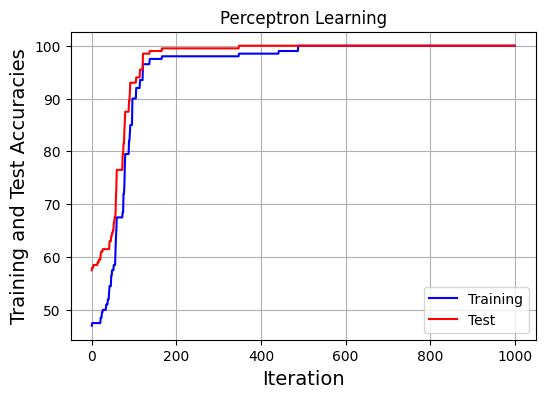

In [10]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, "b", label = "Training")
ax.plot(range(MaxIter), P_test, "r", label = "Test")
ax.grid(True)
ax.legend()
ax.set_title("Perceptron Learning")
ax.set_ylabel("Training and Test Accuracies", fontsize=14)
ax.set_xlabel("Iteration", fontsize=14)
plt.savefig("learningCurves.png")

In [11]:

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
model = Perceptron()
model.fit(X_train, y_train)

yh_train = model.predict(X_train)
print("Accuracy on training set: %6.2f" %(accuracy_score(yh_train, y_train)))

yh_test = model.predict(X_test)
print("Accuracy on test set: %6.2f" %(accuracy_score(yh_test, y_test)))

if (accuracy_score(yh_test, y_test) > 0.99):
    print("Wow, Perfect Classification on Separable dataset!")


Accuracy on training set:   1.00
Accuracy on test set:   1.00
Wow, Perfect Classification on Separable dataset!


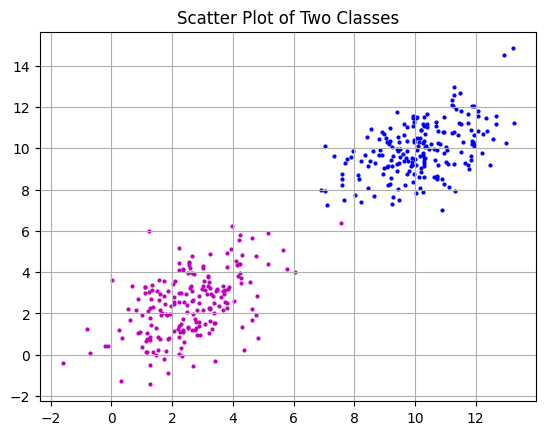

In [12]:
NumDataPerClass = 200

m1 = [2.5, 2.5]
m2 = [10.0, 10.0]

C = [[2, 1], [1, 2]]

A = np.linalg.cholesky(C)

U1 = np.random.randn(NumDataPerClass, 2)
X1 = U1 @ A.T + m1

U2 = np.random.randn(NumDataPerClass, 2)
X2 = U2 @ A.T + m2

fig, ax = plt.subplots()
ax.set_title('Scatter Plot of Two Classes')
ax.scatter(X1[:, 0], X1[:, 1], c="m", s=4)
ax.scatter(X2[:, 0], X2[:, 1], c="b", s=4)
plt.grid()

In [14]:
X = np.concatenate((X1, X2), axis=0)
O = np.ones((2 * NumDataPerClass, 1))
X = np.append(X, O, axis=1)  # Adding bias term

labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0 * np.ones(NumDataPerClass)
y = np.concatenate((labelPos, labelNeg))

rIndex = np.random.permutation(2 * NumDataPerClass)
Xr = X[rIndex]
yr = y[rIndex]


X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]

X_test = Xr[NumDataPerClass:2 * NumDataPerClass]
y_test = yr[NumDataPerClass:2 * NumDataPerClass]


print("Shape of training data (X_train):", X_train.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing data (X_test):", X_test.shape)
print("Shape of testing labels (y_test):", y_test.shape)

Ntrain = NumDataPerClass
Ntest = NumDataPerClass

Shape of training data (X_train): (200, 3)
Shape of training labels (y_train): (200,)
Shape of testing data (X_test): (200, 3)
Shape of testing labels (y_test): (200,)


In [19]:
w = np.random.randn(3)
print("Randomly generated weight vector (w):", w)
print("Initial Percentage Correct: %6.2f" % (PercentCorrect(X_train, y_train, w)))

MaxIter = 4000
alpha = 0.001

P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)

for iter in range(MaxIter):
    r = np.floor(np.random.rand() * Ntrain).astype(int)
    x = X_train[r, :]

    if (y_train[r] * np.dot(x, w) < 0):
        w += alpha * y_train[r] * x

    P_train[iter] = PercentCorrect(X_train, y_train, w)
    P_test[iter] = PercentCorrect(X_test, y_test, w)

print("Percentage Correct After Training: %6.2f %6.2f" % (PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))


Randomly generated weight vector (w): [-0.33668448  0.88074934  1.00721652]
Initial Percentage Correct:  47.00
Percentage Correct After Training:  95.00  95.00


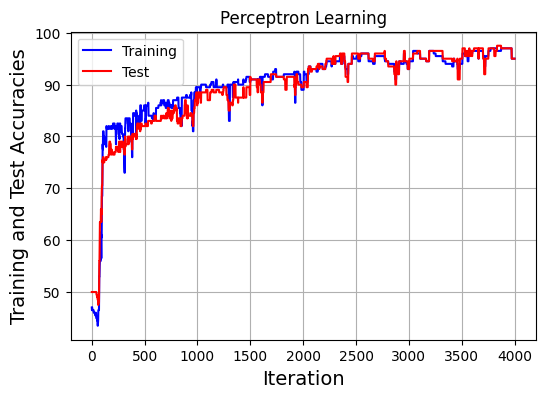

In [20]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, "b", label = "Training")
ax.plot(range(MaxIter), P_test, "r", label = "Test")
ax.grid(True)
ax.legend()
ax.set_title("Perceptron Learning")
ax.set_ylabel("Training and Test Accuracies", fontsize=14)
ax.set_xlabel("Iteration", fontsize=14)
plt.savefig("learningCurves.png")

In [16]:
model = Perceptron()
model.fit(X_train, y_train)

yh_train = model.predict(X_train)
print("Accuracy on training set: %6.2f" % (accuracy_score(yh_train, y_train)))

yh_test = model.predict(X_test)
print("Accuracy on test set: %6.2f" % (accuracy_score(yh_test, y_test)))

if (accuracy_score(yh_test, y_test) > 0.99):
    print("Wow, Perfect Classification on Separable dataset!")

Accuracy on training set:   1.00
Accuracy on test set:   1.00
Wow, Perfect Classification on Separable dataset!
